# __NAME ENTITY RECOGNITION__
## __Use Cases of NER__: 1) Searching for any company's name in any news website and getting it's related articles and related tags and news of that same company. For Ex: Google news where there is an aggregator website where all they get is a text and based on the text we have to derive the company that the news is about. So essentially we are looking at the text and trying to extract the company names, but the problem is let's say a company name is _Tesla_ but it can be a person's name also.

## This is where __NER__system comes into play. It actually tells you what entity the desired word is like Tesla (a person or a company name).

## __NER__ is basically where we try to extract different entities in our text.

## For ex: Elon Musk has told Tesla employees to come back into their respective offices at least 40 hours a week or leave the company. Here __Elon Musk__ is a person and __Tesla__ is a company name which will be extracted by __NER__ system in NLP.

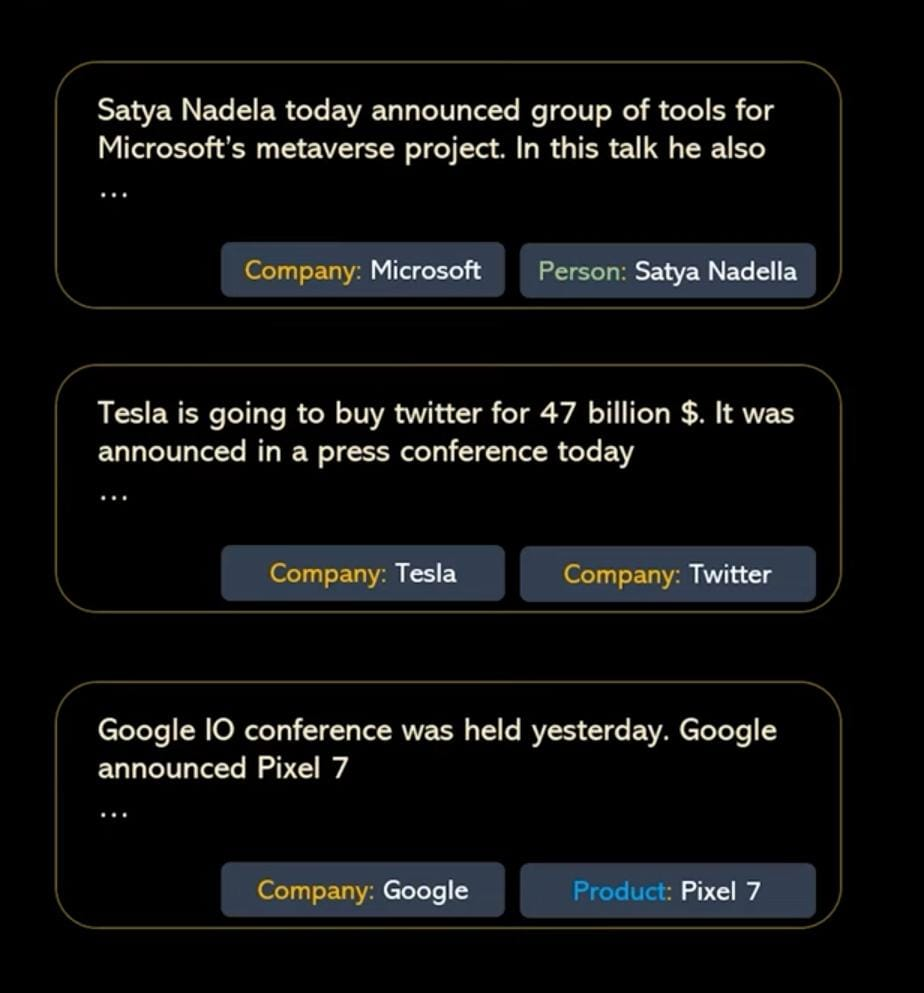

## 2) __Recommendation Systems__: For ex: in any music app or news website or any youtube, etc. we can see headings like "Stories for you", "News for you", "Songs for you", "Articles for you", "Recommended for you", etc.

## 3) __Customer Care Service__: For ex: "Report an Issue or Submit Feedback" page where customer can give suggestions based on their experience where multiple people are filing multiple complaints.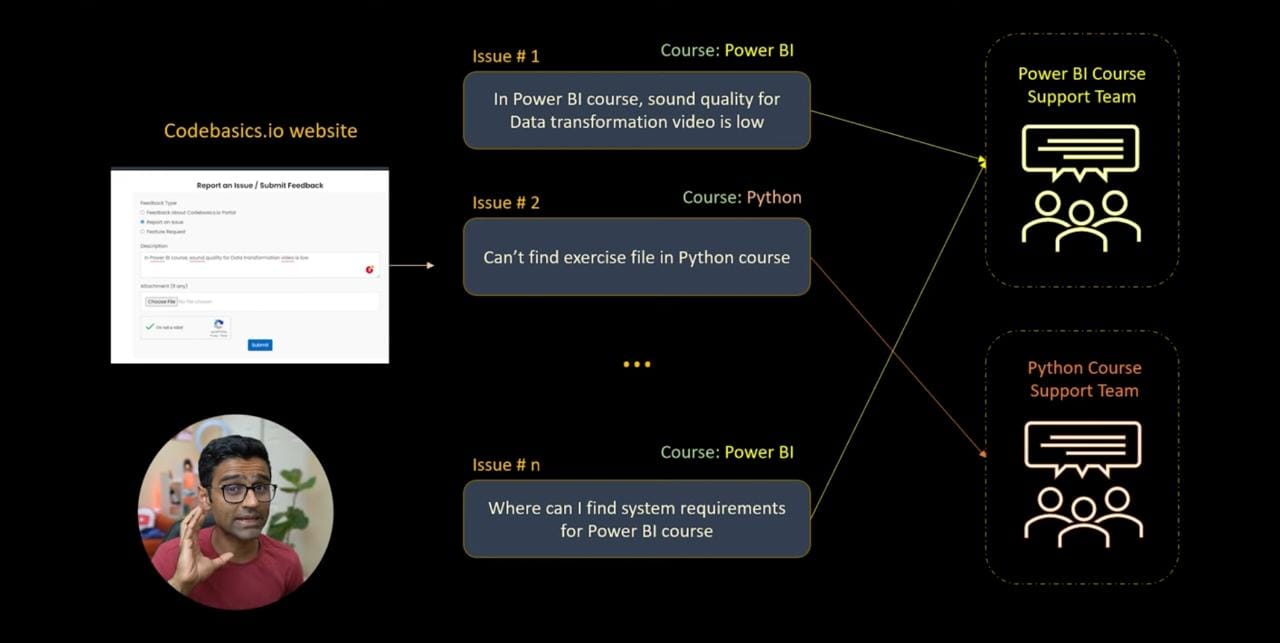

In [1]:
import spacy 

nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

## We'll now see how that 'ner' component works in __spaCy.__

In [3]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")

for ent in doc.ents:
  # doc.ents contains all the entities in the given doc
  print(ent.text, " | ", ent.label_) 


Tesla Inc  |  ORG
$45 billion  |  MONEY


## So it's saying TESLA is an organization or a company whereas $45 billion is MONEY.

In [6]:
doc = nlp("Tesla Inc is going to acquire Twitter Inc for $45 billion")

for ent in doc.ents:
  # doc.ents contains all the entities in the given doc
  print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_)) 

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
Twitter Inc  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


## Now, it gives further explanation. Now we can observe that spacy has something inbuilt that whenever it encounters any word with 1st letter capital followed by 'Inc' is an organization.

In [27]:
# Listing down all the entities
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

## List of entities are also documented on this page: https://spacy.io/models/en

## __Setting custom entities__

In [17]:
doc = nlp("Tesla is going to acquire Twitter for $45 billion")

for ent in doc.ents:
  # doc.ents contains all the entities in the given doc
  print(ent.text, " | ", ent.label_) 

Twitter  |  PERSON
$45 billion  |  MONEY


In [18]:
doc[0]
# This is a single token

Tesla

In [19]:
type(doc[0])

spacy.tokens.token.Token

In [20]:
doc[2:5]
# It's showing us a span of tokens like a substring

going to acquire

In [21]:
type(doc[2:5])

spacy.tokens.span.Span

In [25]:
from spacy.tokens import Span

s1 = Span(doc, 0, 1, label="ORG") # For Tesla
s2 = Span(doc, 5, 6, label="ORG") # For Twitter

doc.set_ents([s1, s2], default="unmodified")



In [26]:
for ent in doc.ents:
  print(ent.text, " | ", ent.label_)

Tesla  |  ORG
Twitter  |  ORG
$45 billion  |  MONEY


## Now it can recognise TESLA and TWITTER as Organization.
## Refer https://spacy.io/api/doc

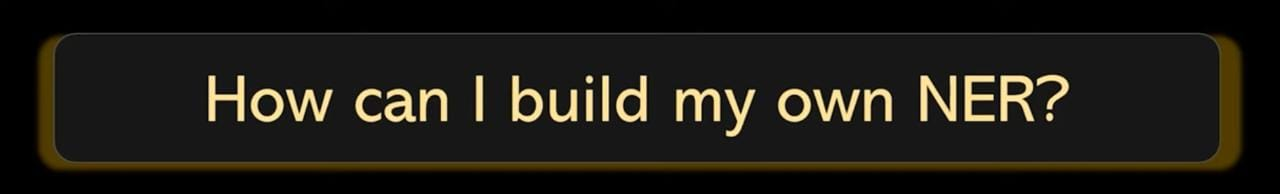

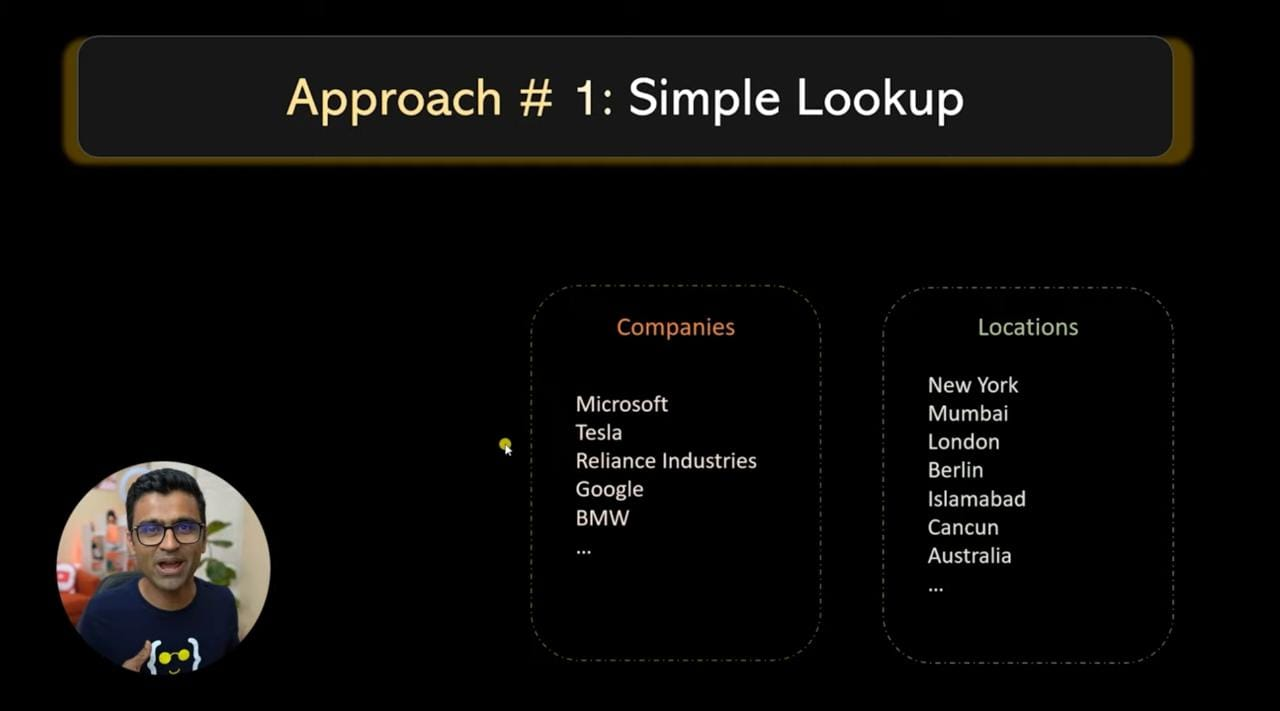

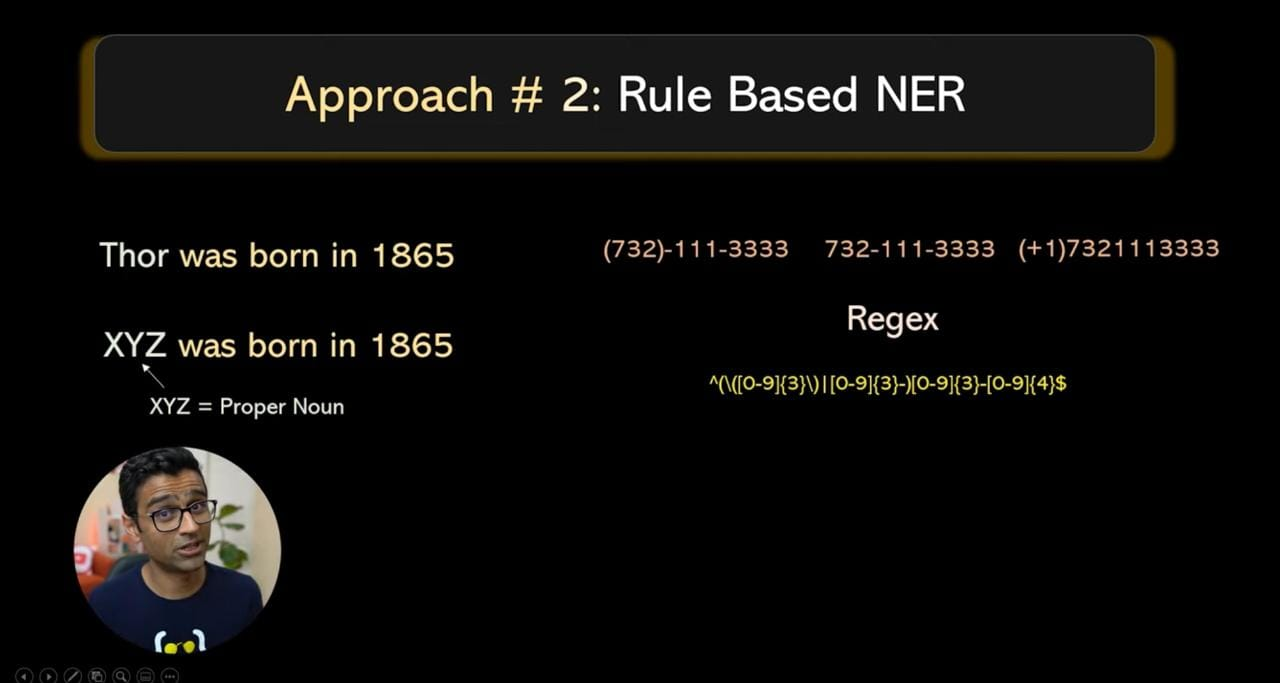

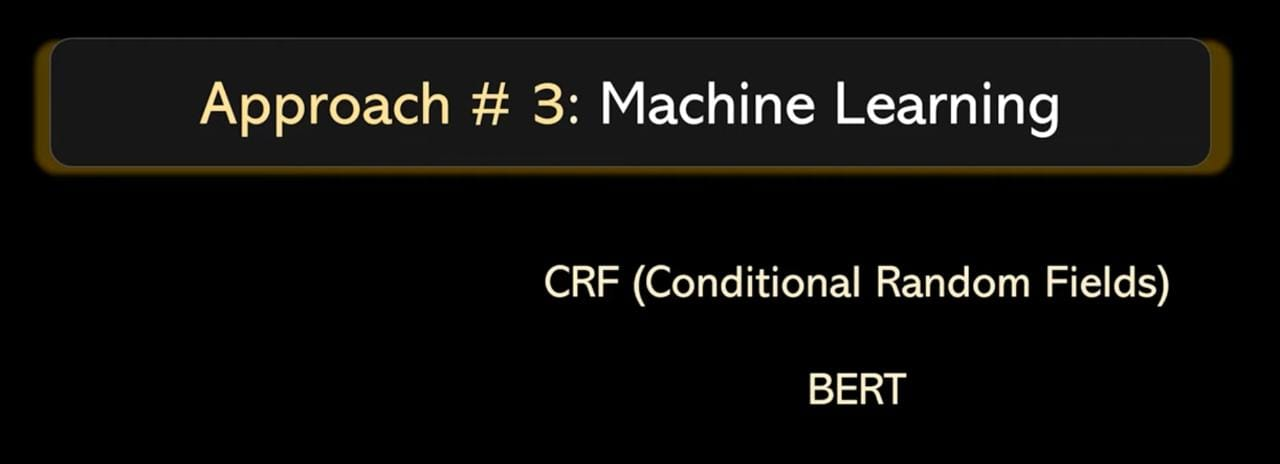